In [1]:
import os
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [2]:
kingfa_datasets_path = "./kingfadatasets/"

In [3]:
def wpt1D(data, wavelet='db1', mode='symmetric', maxlevel=4):
    wp01 = pywt.WaveletPacket(data=data[1750:2261], wavelet=wavelet, mode=mode, maxlevel=maxlevel)
    wp04 = pywt.WaveletPacket(data=data[3500:4011], wavelet=wavelet, mode=mode, maxlevel=maxlevel)
    paths01 = [node.path for node in wp01.get_level(4)]
    df_wpt01 = pd.DataFrame()
    for a in paths01:
        df_wpt01[a] = wp01[a].data
    paths04 = [node.path for node in wp04.get_level(4)]
    df_wpt04 = pd.DataFrame()
    for a in paths04:
        df_wpt04[a] = wp04[a].data
    return pd.concat([df_wpt01, df_wpt04], axis=1).values

In [4]:
X = np.array(pd.read_csv(kingfa_datasets_path+"data.csv", index_col=0))

In [5]:
X = np.apply_along_axis(wpt1D, 1, X)

In [6]:
y = np.array(pd.read_csv(kingfa_datasets_path+"target.csv", index_col=0))

In [7]:
print(X.shape)
print(y.shape)

(3000, 32, 32)
(3000, 1)


In [8]:
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1024)

In [10]:
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=16, kernel_size=(7, 5), input_shape=(32, 32, 1)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

In [13]:
model.add(Conv2D(filters=32, kernel_size=(5, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

In [14]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [15]:
adam = Adam(lr=1e-4)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 28, 16)        576       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 14, 32)        7712      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [17]:
model.compile(optimizer=adam, loss='squared_hinge', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_split=0.1)

Train on 2295 samples, validate on 255 samples
Epoch 1/300
2295/2295 [==============================] - 2s 853us/step - loss: 0.8183 - acc: 0.3386 - val_loss: 0.8148 - val_acc: 0.3529
Epoch 2/300
2295/2295 [==============================] - 2s 687us/step - loss: 0.8135 - acc: 0.3521 - val_loss: 0.8131 - val_acc: 0.3255
Epoch 3/300
2295/2295 [==============================] - 2s 655us/step - loss: 0.8131 - acc: 0.3486 - val_loss: 0.8150 - val_acc: 0.3255
Epoch 4/300
2295/2295 [==============================] - 2s 654us/step - loss: 0.8112 - acc: 0.3778 - val_loss: 0.8120 - val_acc: 0.3255
Epoch 5/300
2295/2295 [==============================] - 1s 646us/step - loss: 0.8090 - acc: 0.4654 - val_loss: 0.8092 - val_acc: 0.3333
Epoch 6/300
2295/2295 [==============================] - 2s 687us/step - loss: 0.8063 - acc: 0.6100 - val_loss: 0.8070 - val_acc: 0.4902
Epoch 7/300
2295/2295 [==============================] - 2s 676us/step - loss: 0.8020 - acc: 0.4845 - val_loss: 0.8003 - val_acc: 0

2295/2295 [==============================] - 1s 623us/step - loss: 0.6931 - acc: 0.9185 - val_loss: 0.6944 - val_acc: 0.8980
Epoch 61/300
2295/2295 [==============================] - 1s 653us/step - loss: 0.6920 - acc: 0.9246 - val_loss: 0.6944 - val_acc: 0.9098
Epoch 62/300
2295/2295 [==============================] - 2s 736us/step - loss: 0.6912 - acc: 0.9346 - val_loss: 0.6931 - val_acc: 0.9176
Epoch 63/300
2295/2295 [==============================] - 2s 658us/step - loss: 0.6906 - acc: 0.9355 - val_loss: 0.6928 - val_acc: 0.9137
Epoch 64/300
2295/2295 [==============================] - 2s 667us/step - loss: 0.6904 - acc: 0.9307 - val_loss: 0.6916 - val_acc: 0.9176
Epoch 65/300
2295/2295 [==============================] - 2s 662us/step - loss: 0.6891 - acc: 0.9438 - val_loss: 0.6914 - val_acc: 0.9216
Epoch 66/300
2295/2295 [==============================] - 2s 671us/step - loss: 0.6883 - acc: 0.9481 - val_loss: 0.6937 - val_acc: 0.9098
Epoch 67/300
2295/2295 [=======================

2295/2295 [==============================] - 1s 638us/step - loss: 0.6758 - acc: 0.9721 - val_loss: 0.6779 - val_acc: 0.9608
Epoch 120/300
2295/2295 [==============================] - 1s 638us/step - loss: 0.6757 - acc: 0.9730 - val_loss: 0.6779 - val_acc: 0.9608
Epoch 121/300
2295/2295 [==============================] - 1s 640us/step - loss: 0.6761 - acc: 0.9695 - val_loss: 0.6775 - val_acc: 0.9647
Epoch 122/300
2295/2295 [==============================] - 1s 634us/step - loss: 0.6756 - acc: 0.9721 - val_loss: 0.6777 - val_acc: 0.9608
Epoch 123/300
2295/2295 [==============================] - 1s 646us/step - loss: 0.6754 - acc: 0.9725 - val_loss: 0.6776 - val_acc: 0.9608
Epoch 124/300
2295/2295 [==============================] - 1s 638us/step - loss: 0.6753 - acc: 0.9743 - val_loss: 0.6772 - val_acc: 0.9647
Epoch 125/300
2295/2295 [==============================] - 1s 634us/step - loss: 0.6751 - acc: 0.9760 - val_loss: 0.6778 - val_acc: 0.9608
Epoch 126/300
2295/2295 [================

Epoch 178/300
2295/2295 [==============================] - 1s 636us/step - loss: 0.6713 - acc: 0.9839 - val_loss: 0.6739 - val_acc: 0.9686
Epoch 179/300
2295/2295 [==============================] - 1s 634us/step - loss: 0.6714 - acc: 0.9817 - val_loss: 0.6741 - val_acc: 0.9647
Epoch 180/300
2295/2295 [==============================] - 2s 669us/step - loss: 0.6712 - acc: 0.9865 - val_loss: 0.6728 - val_acc: 0.9765
Epoch 181/300
2295/2295 [==============================] - 2s 712us/step - loss: 0.6713 - acc: 0.9839 - val_loss: 0.6732 - val_acc: 0.9765
Epoch 182/300
2295/2295 [==============================] - 2s 703us/step - loss: 0.6712 - acc: 0.9839 - val_loss: 0.6732 - val_acc: 0.9765
Epoch 183/300
2295/2295 [==============================] - 2s 690us/step - loss: 0.6711 - acc: 0.9861 - val_loss: 0.6738 - val_acc: 0.9647
Epoch 184/300
2295/2295 [==============================] - 2s 690us/step - loss: 0.6711 - acc: 0.9865 - val_loss: 0.6736 - val_acc: 0.9725
Epoch 185/300
2295/2295 [==

2295/2295 [==============================] - 1s 645us/step - loss: 0.6686 - acc: 0.9965 - val_loss: 0.6696 - val_acc: 0.9922
Epoch 237/300
2295/2295 [==============================] - 2s 686us/step - loss: 0.6687 - acc: 0.9943 - val_loss: 0.6699 - val_acc: 0.9922
Epoch 238/300
2295/2295 [==============================] - 2s 668us/step - loss: 0.6685 - acc: 0.9965 - val_loss: 0.6697 - val_acc: 0.9882
Epoch 239/300
2295/2295 [==============================] - 2s 661us/step - loss: 0.6687 - acc: 0.9952 - val_loss: 0.6701 - val_acc: 0.9882
Epoch 240/300
2295/2295 [==============================] - 2s 670us/step - loss: 0.6686 - acc: 0.9961 - val_loss: 0.6696 - val_acc: 0.9961
Epoch 241/300
2295/2295 [==============================] - 2s 671us/step - loss: 0.6684 - acc: 0.9965 - val_loss: 0.6698 - val_acc: 0.9882
Epoch 242/300
2295/2295 [==============================] - 2s 667us/step - loss: 0.6684 - acc: 0.9965 - val_loss: 0.6700 - val_acc: 0.9882
Epoch 243/300
2295/2295 [================

2295/2295 [==============================] - 1s 645us/step - loss: 0.6674 - acc: 0.9996 - val_loss: 0.6685 - val_acc: 0.9922
Epoch 296/300
2295/2295 [==============================] - 2s 658us/step - loss: 0.6675 - acc: 0.9987 - val_loss: 0.6683 - val_acc: 0.9961
Epoch 297/300
2295/2295 [==============================] - 2s 655us/step - loss: 0.6676 - acc: 0.9987 - val_loss: 0.6682 - val_acc: 1.0000
Epoch 298/300
2295/2295 [==============================] - 1s 648us/step - loss: 0.6674 - acc: 0.9991 - val_loss: 0.6687 - val_acc: 0.9922
Epoch 299/300
2295/2295 [==============================] - 2s 672us/step - loss: 0.6673 - acc: 0.9996 - val_loss: 0.6683 - val_acc: 1.0000
Epoch 300/300
2295/2295 [==============================] - 2s 658us/step - loss: 0.6674 - acc: 0.9996 - val_loss: 0.6683 - val_acc: 0.9961


In [19]:
score = model.evaluate(X_test, y_test)
print("LOSS:", score[0])
print("Accuracy:", score[1])

450/450 [==============================] - 0s 293us/step
LOSS: 0.6683288505342272
Accuracy: 0.9955555555555555


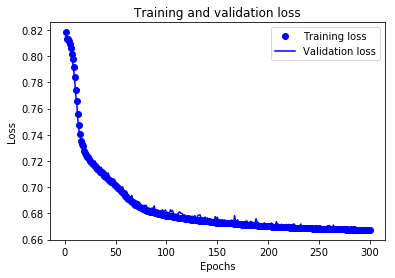

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

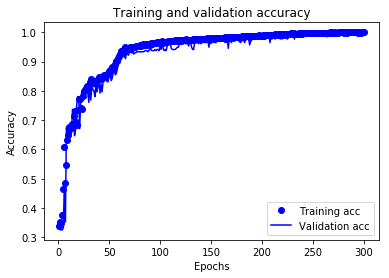

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()